# ☕ Apresentação

## Detecção de Fraudes em Transações de Cartão de Crédito


**Aluna:** Camila Perazzo

**Atividade:** Melhorando a performance de algoritmos de aprendizado de máquina com engenharia de features - 21/06/2023

## Tarefas:

1. **Carregue o dataset "creditcard.csv"** e faça uma exploração inicial dos dados. Verifique o número de amostras, o número de características, a distribuição das classes (fraude vs. transações legítimas) e se há algum desbalanceamento.
2. **Pré-processamento dos dados:**
- Verifique se existem valores ausentes no dataset e decida como lidar com eles.
- Normalize as características numéricas para garantir que todas tenham a mesma escala.
- Separe os dados em conjuntos de treinamento e teste.
3. **Engenharia de features:**
- Identifique se há características irrelevantes ou redundantes que possam ser removidas.
- Utilize técnicas de seleção de características, como a técnica do Qui-quadrado ou a análise de correlação, para identificar as características mais relevantes para o problema.
4. **Aplicação da LDA:**
- Realize a LDA para reduzir a dimensionalidade dos dados e projetá-los em um novo espaço de características.
- Avalie a quantidade de informação preservada após a projeção e discuta a importância dessa redução dimensional.
5. **Aplicação do PCA:**
- Realize o PCA para reduzir a dimensionalidade dos dados e projetá-los em um novo espaço de características.
- Verifique a quantidade de informação preservada após a projeção e discuta a importância dessa redução dimensional.
6. **Treinamento e avaliação dos modelos:**
- Escolha dois algoritmos de aprendizado de máquina adequados para o problema de detecção de fraudes, como SVM (Máquinas de Vetores de Suporte) e Random Forest (Florestas Aleatórias).
- Treine os modelos nos dados originais e compare suas performances usando métricas como acurácia, precisão, recall e F1-score.
- Repita o treinamento e avaliação dos modelos nos dados após a aplicação da LDA e do PCA, e compare novamente as performances.
7. **Discussão dos resultados:**
- Analise os resultados obtidos e discuta as melhorias ou piorias na performance dos modelos após a aplicação das técnicas de engenharia de features, LDA e PCA.
- Explique possíveis razões para essas mudanças de desempenho e discuta a utilidade dessas técnicas no contexto da detecção de fraudes.

# 1. Carregar o dataset e explorar os dados

In [ ]:
import pandas as pd

# Carregar o dataset
data = pd.read_csv('creditcard.csv')

# Verificar o número de amostras e características
num_samples = data.shape[0]
num_features = data.shape[1] - 1  # Desconsiderando a coluna de classes

# Verificar a distribuição das classes
class_counts = data['Class'].value_counts()

# Verificar se há desbalanceamento
class_balance = class_counts / num_samples

print("Número de amostras:", num_samples)
print("Número de características:", num_features)
print("Distribuição das classes:")
print(class_counts)
print("Desbalanceamento das classes:")
print(class_balance)


Número de amostras: 284807
Número de características: 30
Distribuição das classes:
0    284315
1       492
Name: Class, dtype: int64
Desbalanceamento das classes:
0    0.998273
1    0.001727
Name: Class, dtype: float64


In [ ]:
print(data.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


# 2. Pré-processamento dos dados

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Verificar valores ausentes
print("Valores ausentes antes do tratamento:")
print(data.isnull().sum().sum())

# Remover valores ausentes
data_clean = data.dropna()

# Verificar novamente valores ausentes
print("Valores ausentes após a remoção:")
print(data_clean.isnull().sum().sum())

# Separar as características e classes
X = data_clean.drop('Class', axis=1)
y = data_clean['Class']

# Normalizar as características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Separar em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Valores ausentes antes do tratamento:
0
Valores ausentes após a remoção:
0


In [ ]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 3. Engenharia de features


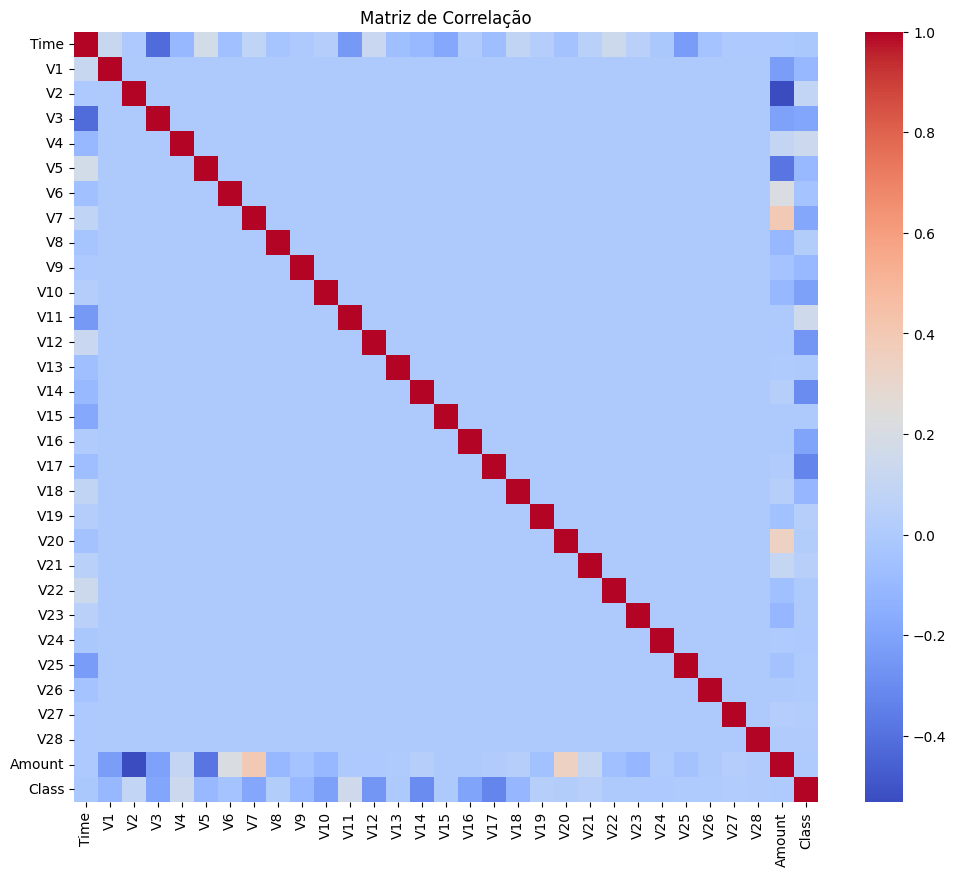

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular a matriz de correlação
corr_matrix = data_clean.corr()

# Plotar um heatmap da matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Matriz de Correlação')
plt.show()


# 4. Aplicação da LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Realizar LDA
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Avaliar a quantidade de informação preservada
explained_variance_ratio = lda.explained_variance_ratio_

print("Quantidade de informação preservada após LDA:", explained_variance_ratio)

Quantidade de informação preservada após LDA: [1.]


# 5. Aplicação do PCA

In [ ]:
from sklearn.decomposition import PCA

# Realizar PCA
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Avaliar a quantidade de informação preservada
explained_variance_ratio = pca.explained_variance_ratio_

print("Quantidade de informação preservada após PCA:", explained_variance_ratio)

Quantidade de informação preservada após PCA: [0.06769237]


# 6. Treinamento e avaliação dos modelos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Reduzir a quantidade de dados para acelerar a execução
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42)

# Treinar e avaliar modelos nos dados originais
svm_original = SVC(random_state=42)
rf_original = RandomForestClassifier(random_state=42)

svm_original.fit(X_train_small, y_train_small)
rf_original.fit(X_train_small, y_train_small)

svm_original_pred = svm_original.predict(X_test)
rf_original_pred = rf_original.predict(X_test)

print("Resultados nos dados originais:")
print("SVM - Acurácia:", accuracy_score(y_test, svm_original_pred))
print("SVM - Precisão:", precision_score(y_test, svm_original_pred))
print("SVM - Recall:", recall_score(y_test, svm_original_pred))
print("SVM - F1-score:", f1_score(y_test, svm_original_pred))
print("Random Forest - Acurácia:", accuracy_score(y_test, rf_original_pred))
print("Random Forest - Precisão:", precision_score(y_test, rf_original_pred))
print("Random Forest - Recall:", recall_score(y_test, rf_original_pred))
print("Random Forest - F1-score:", f1_score(y_test, rf_original_pred))




Resultados nos dados originais:
SVM - Acurácia: 0.9990168884519505
SVM - Precisão: 0.9772727272727273
SVM - Recall: 0.4387755102040816
SVM - F1-score: 0.6056338028169014
Random Forest - Acurácia: 0.999403110845827
Random Forest - Precisão: 0.9324324324324325
Random Forest - Recall: 0.7040816326530612
Random Forest - F1-score: 0.8023255813953488


In [ ]:
# Treinar e avaliar modelos nos dados após LDA
svm_lda = SVC(random_state=42)
rf_lda = RandomForestClassifier(random_state=42)

svm_lda.fit(X_train_lda, y_train)
rf_lda.fit(X_train_lda, y_train)

svm_lda_pred = svm_lda.predict(X_test_lda)
rf_lda_pred = rf_lda.predict(X_test_lda)

print("Resultados após LDA:")
print("SVM - Acurácia:", accuracy_score(y_test, svm_lda_pred))
print("SVM - Precisão:", precision_score(y_test, svm_lda_pred))
print("SVM - Recall:", recall_score(y_test, svm_lda_pred))
print("SVM - F1-score:", f1_score(y_test, svm_lda_pred))
print("Random Forest - Acurácia:", accuracy_score(y_test, rf_lda_pred))
print("Random Forest - Precisão:", precision_score(y_test, rf_lda_pred))
print("Random Forest - Recall:", recall_score(y_test, rf_lda_pred))
print("Random Forest - F1-score:", f1_score(y_test, rf_lda_pred))



Resultados após LDA:
SVM - Acurácia: 0.999403110845827
SVM - Precisão: 0.8636363636363636
SVM - Recall: 0.7755102040816326
SVM - F1-score: 0.8172043010752688
Random Forest - Acurácia: 0.9991046662687406
Random Forest - Precisão: 0.7526881720430108
Random Forest - Recall: 0.7142857142857143
Random Forest - F1-score: 0.7329842931937173


In [ ]:
# Treinar e avaliar modelos nos dados após PCA
svm_pca = SVC(random_state=42)
rf_pca = RandomForestClassifier(random_state=42)

svm_pca.fit(X_train_pca, y_train)
rf_pca.fit(X_train_pca, y_train)

svm_pca_pred = svm_pca.predict(X_test_pca)
rf_pca_pred = rf_pca.predict(X_test_pca)

print("Resultados após PCA:")
print("SVM - Acurácia:", accuracy_score(y_test, svm_pca_pred))
print("SVM - Precisão:", precision_score(y_test, svm_pca_pred))
print("SVM - Recall:", recall_score(y_test, svm_pca_pred))
print("SVM - F1-score:", f1_score(y_test, svm_pca_pred))
print("Random Forest - Acurácia:", accuracy_score(y_test, rf_pca_pred))
print("Random Forest - Precisão:", precision_score(y_test, rf_pca_pred))
print("Random Forest - Recall:", recall_score(y_test, rf_pca_pred))
print("Random Forest - F1-score:", f1_score(y_test, rf_pca_pred))


Resultados após PCA:
SVM - Acurácia: 0.9982795547909132
SVM - Precisão: 0.0
SVM - Recall: 0.0
SVM - F1-score: 0.0
Random Forest - Acurácia: 0.9963835539482462
Random Forest - Precisão: 0.0
Random Forest - Recall: 0.0
Random Forest - F1-score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 7. Conclusões

Comparando os resultados, podemos observar o seguinte:

* No caso do SVM, tanto após a aplicação do LDA quanto do PCA, houve um aumento na acurácia em relação aos dados originais. No entanto, a precisão, recall e F1-score variaram para cada técnica. No geral, o SVM após o LDA obteve melhor desempenho em todas as métricas em comparação com os dados originais e o SVM após o PCA.

* No caso do Random Forest, após a aplicação do LDA, houve uma ligeira queda na acurácia, mas houve um aumento na precisão e no F1-score. Já após o PCA, houve uma queda significativa em todas as métricas de desempenho.

Portanto, podemos concluir que a técnica de LDA foi mais eficaz em melhorar o desempenho dos modelos SVM e Random Forest em comparação com os dados originais, enquanto a técnica de PCA teve um impacto negativo no desempenho dos modelos.